In [77]:
import matplotlib.pyplot as plt
# 파이썬 plot찍는 패키지인 matplotlib안에 pyplot모듈을 plt로 불러옵니다
from sklearn.preprocessing import StandardScaler
# scikit-learn패키지의 preprocessing모듈에서 standardScaler함수를 불러옵니다.
from sklearn.model_selection import train_test_split
# scikit-learn패키지의 model_selection모듈에서 train_test_split함수를 불러옵니다.
from sklearn import datasets
# scikit-learn패키지의 datasets모듈을 불러옵니다
import numpy as np
# 넘파이도 불러오고
from matplotlib.colors import ListedColormap
#matplotlib에서 listedcolormap도 부르고
from sklearn.neighbors import KNeighborsClassifier
# 마지막으로 KNN도 불러옵니다

In [78]:
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target
index = [0,49,50,99,100,149]
print(X[:3])
print(y[index])
# X는 petal length와 petal width만 불러온 데이터입니다.
# target은 setosa, versicolor, virginica를 0,1,2로 라벨링한 어레이입니다.

[[ 1.4  0.2]
 [ 1.4  0.2]
 [ 1.3  0.2]]
[0 0 1 1 2 2]


In [79]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=0)
# X와 y를 test데이터와 train데이터로 나누는 함수입니다.
# test_size는 만약 0~1사이의 값이 들어간다면, 훈련데이터의 비율, 정수가 들어간다면 훈련데이터의 개수로 인식됩니다.
# random_state는 랜덤시드와 같이 같은 랜덤결과를 내기위한 인자입니다.

In [80]:
sc = StandardScaler()
# X에 대해 정규화를 하기 위해 sc class를 만들어주고
print(X_train[:3])


[[ 3.5  1. ]
 [ 5.5  1.8]
 [ 5.7  2.5]]


In [81]:
sc.fit(X_train)
print(sc.fit(X_train))
print(X_train[:3])
#정규화를 하기위한 평균과 표준오차를 구합니다.

StandardScaler(copy=True, with_mean=True, with_std=True)
[[ 3.5  1. ]
 [ 5.5  1.8]
 [ 5.7  2.5]]


In [82]:
X_train_std = sc.transform(X_train)
#X_train_std라는 변수에 정규화를 한 X_train을 할당합니다.
print(len(X_train_std))
print(X_train_std[:3])
X_test_std = sc.transform(X_test)
#X_test_std라는 변수에 정규화를 한 X_test을 할당합니다.
print(len(X_test_std))
print(X_test_std[:3])

105
[[-0.18295039 -0.29145882]
 [ 0.93066067  0.73721938]
 [ 1.04202177  1.6373128 ]]
45
[[ 0.70793846  1.50872803]
 [ 0.09545238 -0.29145882]
 [-1.35224199 -1.32013702]]


In [83]:
X_combined_std = np.vstack((X_train_std, X_test_std))
#np.vstack은 vertical방향으로 array를 붙여줍니다.
print(X_combined_std[:3])
print(X_combined_std[105:108])
print(len(X_combined_std))

[[-0.18295039 -0.29145882]
 [ 0.93066067  0.73721938]
 [ 1.04202177  1.6373128 ]]
[[ 0.70793846  1.50872803]
 [ 0.09545238 -0.29145882]
 [-1.35224199 -1.32013702]]
150


In [84]:
y_combined = np.hstack((y_train, y_test))
# np.hstack은 당연히 horizontal 방향으로 array를 붙여줍니다.
print(y_combined)
knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
# 앞서 배웠던 개념에 의해 인자를 설명드리면,
# 우선 최근접 이웃 몇명을 볼거냐가 n_neighbors
# 거리를 재는 방법을 무엇을 쓸것이냐가 p 
# 이떄 p=1이면 맨해튼, p=2이면 유클리디안 거리측정방법을 사용합니다.
knn.fit(X_train_std, y_train)
#설정한 knn방식을 X_train_std와 y_train데이터를 사용해서 학습시킵니다.

[1 2 2 2 2 1 2 1 1 2 2 2 2 1 2 1 0 2 1 1 1 1 2 0 0 2 1 0 0 1 0 2 1 0 1 2 1
 0 2 2 2 2 0 0 2 2 0 2 0 2 2 0 0 2 0 0 0 1 2 2 0 0 0 1 1 0 0 1 0 2 1 2 1 0
 2 0 2 0 0 2 0 2 1 1 1 2 2 1 1 0 1 2 2 0 1 1 1 1 0 0 0 2 1 2 0 2 1 0 2 0 2
 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0 1 1 1 2 0 2
 0 0]


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [105]:
# 이제 플롯으로 그려봅시다
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    #인자 5개가 들어가는 함수를 만듭니다.
    markers = ('s', 'x', 'o', '^', 'v')
    # 플롯에 찍을 마커를 정하고
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    # 플롯에 찍을 마커의 색도 미리 넣어둡니다. 
    # 우리는 변수를 3개 쓰지만, 나중에 변수가 더 많아질 수 있으니 5개까지 넣어둡니다
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # 색집합 colors에서 우리가 찍을 y의 고유카운트만큼 색을 꺼내서 cmap에 저장합니다
    
    # 이제 KNN이 구별해주는 경계를 그려봅니다.
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    # x1은 petal length
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    # x2는 petal width입니다
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    # print('xx1 = ',xx1)
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    # print('Z = ',Z)
    Z = Z.reshape(xx1.shape)
    # print('reshaped Z = ',Z)
    plt.contourf(xx1, xx2, Z, alpha=0.2, cmap=cmap)
    # contouf는 어떠한 shape를 좌표명면상에 그리는 함수입니다.
    # x와 y를 각각 지정해주고 구분값 라벨을 넣어 준 뒤
    # 투명도와 색을 지정해 줍니다.
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # 이제 실제 데이터를 찍어봅시다.
    for idx, cl in enumerate(np.unique(y)):
    # enumerate는 저번에 설명한 것과 같이 포문으로 어떤 어레이나 리스트 안의 element와 element의 index까지 반환해주는 함수입니다.
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)
        #스캐터 plot을 찍는데, 우선 'y == 어떠한 라벨값'을 인덱스로 사용해서 라벨별 x를 뽑아 색과 마커를 모두 그 인덱스에 맞게 찍어줍니다.
        #총 3번의 포문이 돌아 0,1,2의 즉, setosa 등과 같은 꽃종류?를 구별해 줍니다.
        #근데 여기까지만 하면 어떤게 트레이닝이고 어떤게 테스트인지 모르게 됩니다.
        #따라서 아래와 같이 테스트 데이터에는 회색 테두리를 둘러주는 코드를 넣습니다.
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], facecolors='none', edgecolors='gray',
                    alpha=1.0, linewidth=1, marker='o',
                    s=55, label='test set')
        

xx1 =  [[-2.57496421 -2.55496421 -2.53496421 ...,  2.66503579  2.68503579
   2.70503579]
 [-2.57496421 -2.55496421 -2.53496421 ...,  2.66503579  2.68503579
   2.70503579]
 [-2.57496421 -2.55496421 -2.53496421 ...,  2.66503579  2.68503579
   2.70503579]
 ..., 
 [-2.57496421 -2.55496421 -2.53496421 ...,  2.66503579  2.68503579
   2.70503579]
 [-2.57496421 -2.55496421 -2.53496421 ...,  2.66503579  2.68503579
   2.70503579]
 [-2.57496421 -2.55496421 -2.53496421 ...,  2.66503579  2.68503579
   2.70503579]]
Z =  [0 0 0 ..., 2 2 2]
reshaped Z =  [[0 0 0 ..., 1 1 1]
 [0 0 0 ..., 1 1 1]
 [0 0 0 ..., 1 1 1]
 ..., 
 [2 2 2 ..., 2 2 2]
 [2 2 2 ..., 2 2 2]
 [2 2 2 ..., 2 2 2]]


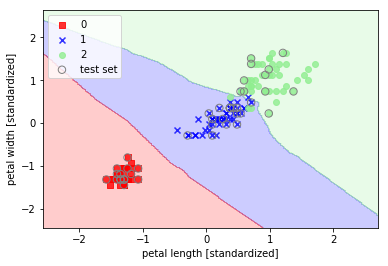

In [104]:
# 이제 다왔습니다. 실제 우리가 전처리한 데이터를 넣고, 테스트데이터의 인덱스도 넣어준 뒤 
# xlabel과 ylabel, 그리고 마지막으로 범례까지 넣어준 뒤 plt.show()를 합니다.
plot_decision_regions(X_combined_std, y_combined, classifier=knn, test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()